# Import used libraries 

In [8]:
import pandas as pd # for data loading and some visualization


# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# visualization 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px

%matplotlib inline

## Load dataset 

In [4]:
df = pd.read_csv('../Data/Cleaned_data.csv')

In [5]:
df.shape

(113937, 18)

In [6]:
df.head()

,ListingCreationDate,Term,LoanStatus,BorrowerAPR,BorrowerRate,ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,EmploymentStatus,IsBorrowerHomeowner,DelinquenciesLast7Years,StatedMonthlyIncome,TotalProsperLoans,LoanOriginalAmount,LoanOriginationDate,Recommendations,Investors
0,2007-08-26 19:09:29.263,36,Completed,0.16516,0.1580,NaN,NaN,0,CO,Self-employed,True,4.0,3083.333333,0,9425,2007-09-12 00:00:00.000,0,258
1,2014-02-27 08:28:07.900,36,Current,0.12016,0.0920,A,7.0,2,CO,Employed,False,0.0,6125.000000,0,10000,2014-03-03 00:00:00.000,0,1
2,2007-01-05 15:00:47.090,36,Completed,0.28269,0.2750,NaN,NaN,0,GA,Not available,False,0.0,2083.333333,0,3001,2007-01-17 00:00:00.000,0,41
3,2012-10-22 11:02:35.010,36,Current,0.12528,0.0974,A,9.0,16,GA,Employed,True,14.0,2875.000000,0,10000,2012-11-01 00:00:00.000,0,158
4,2013-09-14 18:38:39.097,36,Current,0.24614,0.2085,D,4.0,2,MN,Employed,True,0.0,9583.333333,1,15000,2013-09-20 00:00:00.000,0,20


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ListingCreationDate        113937 non-null  object 
 1   Term                       113937 non-null  int64  
 2   LoanStatus                 113937 non-null  object 
 3   BorrowerAPR                113912 non-null  float64
 4   BorrowerRate               113937 non-null  float64
 5   ProsperRating (Alpha)      84853 non-null   object 
 6   ProsperScore               84853 non-null   float64
 7   ListingCategory (numeric)  113937 non-null  int64  
 8   BorrowerState              108422 non-null  object 
 9   EmploymentStatus           111682 non-null  object 
 10  IsBorrowerHomeowner        113937 non-null  bool   
 11  DelinquenciesLast7Years    112947 non-null  float64
 12  StatedMonthlyIncome        113937 non-null  float64
 13  TotalProsperLoans          11

In [12]:
## convert data type
df['ProsperScore'] = df['ProsperScore'].astype('category')
df['TotalProsperLoans'] = df['TotalProsperLoans'].fillna(0).astype('int64')
df['ListingCreationDate'] = pd.to_datetime(df['ListingCreationDate'])
df['LoanOriginationDate'] = pd.to_datetime(df['LoanOriginationDate'])

In this notebook we are going to create different visualization which are being categorized in three classes that are univariate analysis, bivariate analysis and multivariate analysis

# Univariate analysis 

In univariate analysis section, I am going to investigate distribution of individual variables. 

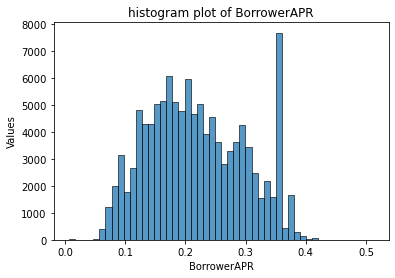

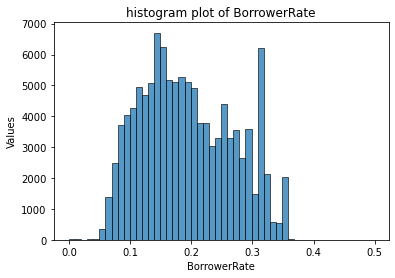

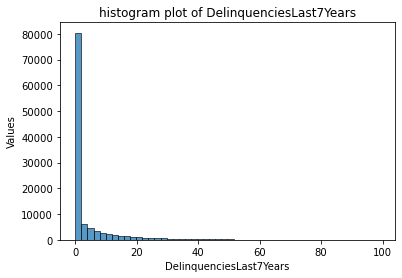

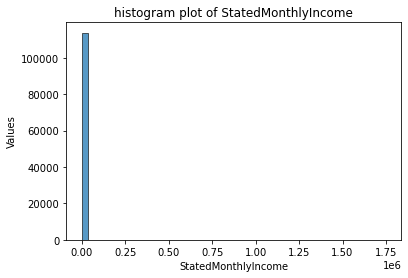

In [13]:
## histogram of quantititave variables 
def histogram(df:pd.DataFrame,cols,**kwargs)->pd.DataFrame:
    """this function aims to plot histogram of float columns 
    
    Args
    ----
    df: dataframe: this is the dataset 
    
    cols: str: columns to be ploted 
    
    Returns
    -------
    None 
    
    """
    sns.histplot(data=df,x=cols,**kwargs);
    plt.xlabel(cols)
    plt.ylabel('Values')
    plt.title(f'histogram plot of {cols}')
    plt.show()
    
float_columns = df.loc[:, df.dtypes == float].columns.tolist()

for i in float_columns:
    histogram(df,i,bins=50)

From the above visualization, Two columns seem to be normally distributed which are `BorrowerAPR` and `BorrowerRate`others are skewed to the left

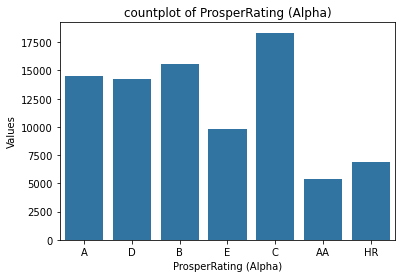

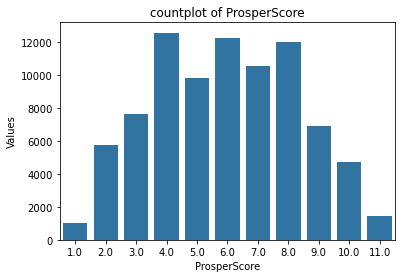

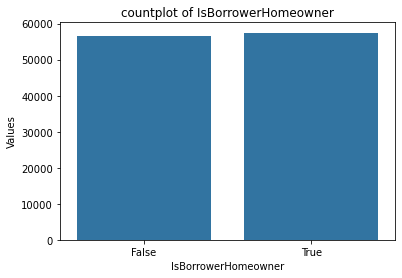

In [17]:
# countplot of qualitative columns 
def countplot(df:pd.DataFrame,cols,rotation=0)->pd.DataFrame:
    """this function helps to provide countplots of different qualitative columns 
    
    Args
    ----
    
    df: dataframe: the dataset
    
    cols: string: column to be plotted
    
    rotation: rotation of the x axis
    
    Return
    ------
    None 
    
    """
    sns.countplot(data=df,x=cols,color=sns.color_palette()[0])
    plt.xlabel(cols)
    plt.ylabel('Values')
    plt.title(f'countplot of {cols}')
    plt.xticks(rotation=rotation)
    plt.show()
    
for i in ['ProsperRating (Alpha)','ProsperScore','IsBorrowerHomeowner']:
    countplot(df,i)  

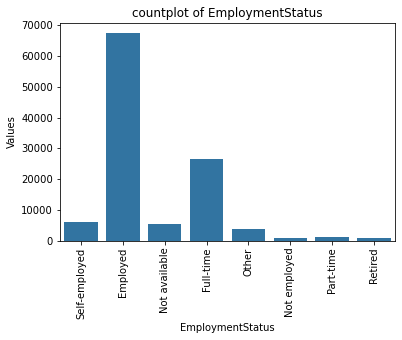

In [18]:
countplot(df,'EmploymentStatus',rotation=90)

continuing to qualitative,I used countplot to analysis the frequency of different categories in different features of the dataset. Starting with ProsperRating (Alpha), we can see that "C" category outweighs others, whereby 4 is customer risk sccore with high values in the properscore columns. Borrow home owner status are quite balanced and those who are employed are the one with the most loan compared to the other employee job status